# [Prompts for this code](https://chat.openai.com/share/e3e3c0ec-c761-4d86-a41a-4210ebb9b6c3)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Read the JSON file into a DataFrame
df = pd.read_json('/kaggle/input/runlogoct272023/runlogOct272023.json')

# Display the first few rows of the DataFrame
df.head()

,runId,date,duration,runKey,imageUrl,length,type,surface,pace,sleepHours,sleepToBedTime,sleepWakeTime,runListenedTo,temperature,shoeAge,startTime
0,772,2021-03-14,00:35:55,NaN,None,5.20,outdoor,street,00:06:54.4230769,8.0,2021-03-14T00:00:00,2021-03-14T08:00:00,podcast - history,60.0,32,2021-03-14T14:00:00
1,775,2021-03-17,00:35:35,NaN,None,5.28,outdoor,street,00:06:44.3560606,7.0,2021-03-17T23:00:00,2021-03-17T06:00:00,podcast - web development,60.0,35,2021-03-17T16:00:00
2,780,2021-03-22,00:31:10,NaN,None,4.64,outdoor,street,00:06:43.0172414,7.0,2021-03-22T23:00:00,2021-03-22T06:00:00,podcast- history,60.0,1,2021-03-22T16:30:00
3,782,2021-03-24,00:25:53,NaN,None,3.69,outdoor,street,00:07:00.8672087,8.0,2021-03-24T22:00:00,2021-03-24T06:00:00,podcast - web development,60.0,2,2021-03-24T15:30:00
4,785,2021-03-27,00:40:04,NaN,None,5.97,outdoor,street,00:06:42.6800670,9.0,2021-03-27T23:00:00,2021-03-27T08:00:00,music - rock,65.0,4,2021-03-27T10:30:00


In [3]:
# Convert date columns to datetime format
df['date'] = pd.to_datetime(df['date'])
df['sleepToBedTime'] = pd.to_datetime(df['sleepToBedTime'])
df['sleepWakeTime'] = pd.to_datetime(df['sleepWakeTime'])
df['startTime'] = pd.to_datetime(df['startTime'])

# Convert duration and pace columns to timedelta format
df['duration'] = pd.to_timedelta(df['duration'])
df['pace'] = pd.to_timedelta(df['pace'])

# returns the average of the sleepHours per month 

In [4]:
# Extract month and year from the date column
df['month_year'] = df['date'].dt.to_period('M')

# Group by month_year and calculate the mean of sleepHours
avg_sleep_per_month = df.groupby('month_year')['sleepHours'].mean().reset_index()

avg_sleep_per_month

,month_year,sleepHours
0,2019-02,0.000000
1,2019-03,0.000000
2,2019-04,0.000000
3,2019-05,0.000000
4,2019-06,0.000000
5,2019-07,0.000000
6,2019-08,0.000000
7,2019-09,0.000000
8,2019-10,0.000000
9,2019-11,0.000000


In [5]:
avg_sleep_per_month_derived = avg_sleep_per_month.drop(index=range(0, 22)).reset_index(drop=True)


In [6]:
avg_sleep_per_month_derived

,month_year,sleepHours
0,2020-12,6.758065
1,2021-01,7.306452
2,2021-02,7.038462
3,2021-03,7.172414
4,2021-04,7.340909
5,2021-05,7.200000
6,2021-06,7.116667
7,2021-07,7.103793
8,2021-08,7.100000
9,2021-09,6.928571


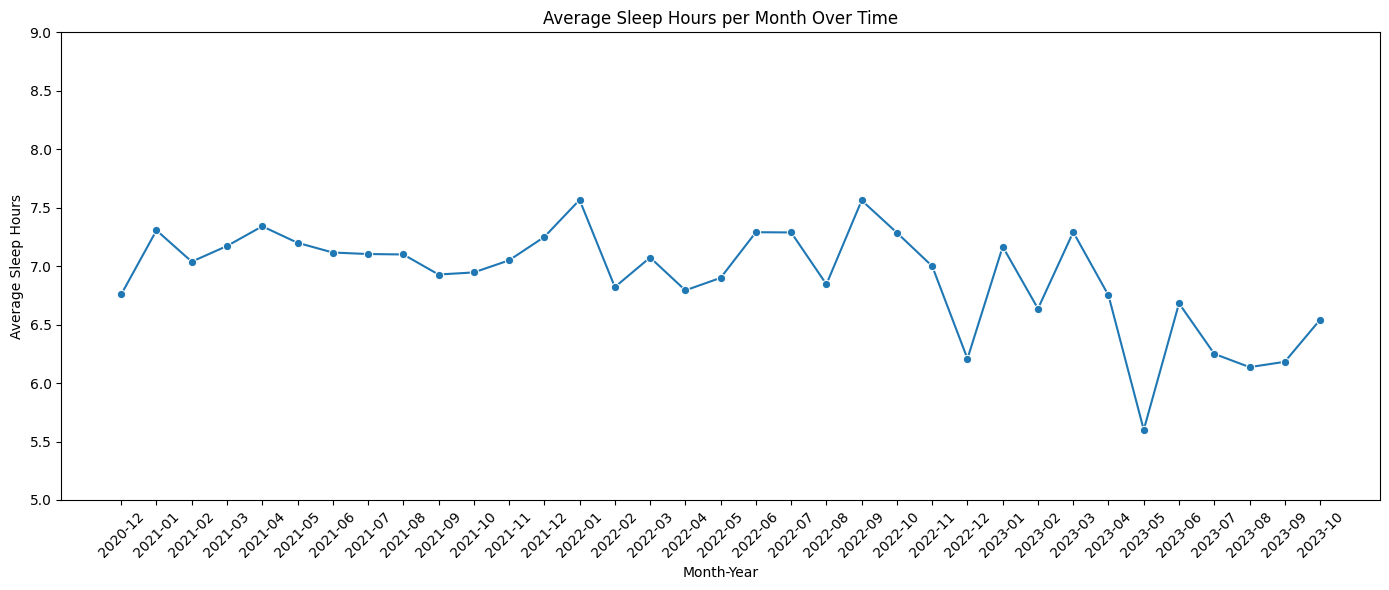

In [7]:
# Convert the month_year column to a string format for plotting
avg_sleep_per_month_derived['month_year'] = avg_sleep_per_month_derived['month_year'].astype(str)

# Set up the plot again
plt.figure(figsize=(14, 6))
sns.lineplot(x='month_year', y='sleepHours', data=avg_sleep_per_month_derived, marker='o')
plt.title('Average Sleep Hours per Month Over Time')
plt.ylabel('Average Sleep Hours')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.ylim(5, 9)

# Display the plot
plt.tight_layout()
plt.show()

In [8]:
# Filter the main DataFrame to only include rows from December 2020 onwards and without runs longer than 18 miles
filtered_df_date = df[df['date'] >= '2020-12-01']
filtered_df_length = filtered_df_date[filtered_df_date['length'] <= 18]
filtered_df = filtered_df_length

# Extract month and year from the date column
filtered_df['month_year'] = filtered_df['date'].dt.to_period('M')

# Group by month_year and calculate the mean of pace
avg_pace_per_month = filtered_df.groupby('month_year')['pace'].mean()

# Convert the timedelta to a more human-readable format (minutes:seconds)
avg_pace_per_month = avg_pace_per_month.dt.total_seconds().div(60).round(2)  # Convert to minutes
avg_pace_per_month = avg_pace_per_month.apply(lambda x: f"{int(x)}:{int((x*60) % 60):02d}")  # Format as minutes:seconds

avg_pace_per_month

/tmp/ipykernel_32/393509003.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month_year'] = filtered_df['date'].dt.to_period('M')


month_year
2020-12    6:42
2021-01    6:47
2021-02    6:57
2021-03    6:52
2021-04    6:51
2021-05    6:45
2021-06    6:44
2021-07    6:52
2021-08    6:54
2021-09    6:52
2021-10    6:52
2021-11    6:53
2021-12    6:51
2022-01    6:53
2022-02    7:00
2022-03    7:00
2022-04    6:58
2022-05    6:53
2022-06    7:18
2022-07    7:12
2022-08    7:22
2022-09    7:24
2022-10    7:13
2022-11    7:31
2022-12    7:29
2023-01    7:01
2023-02    6:53
2023-03    7:00
2023-04    7:03
2023-05    7:27
2023-06    7:13
2023-07    7:09
2023-08    7:07
2023-09    7:05
2023-10    7:01
Freq: M, Name: pace, dtype: object

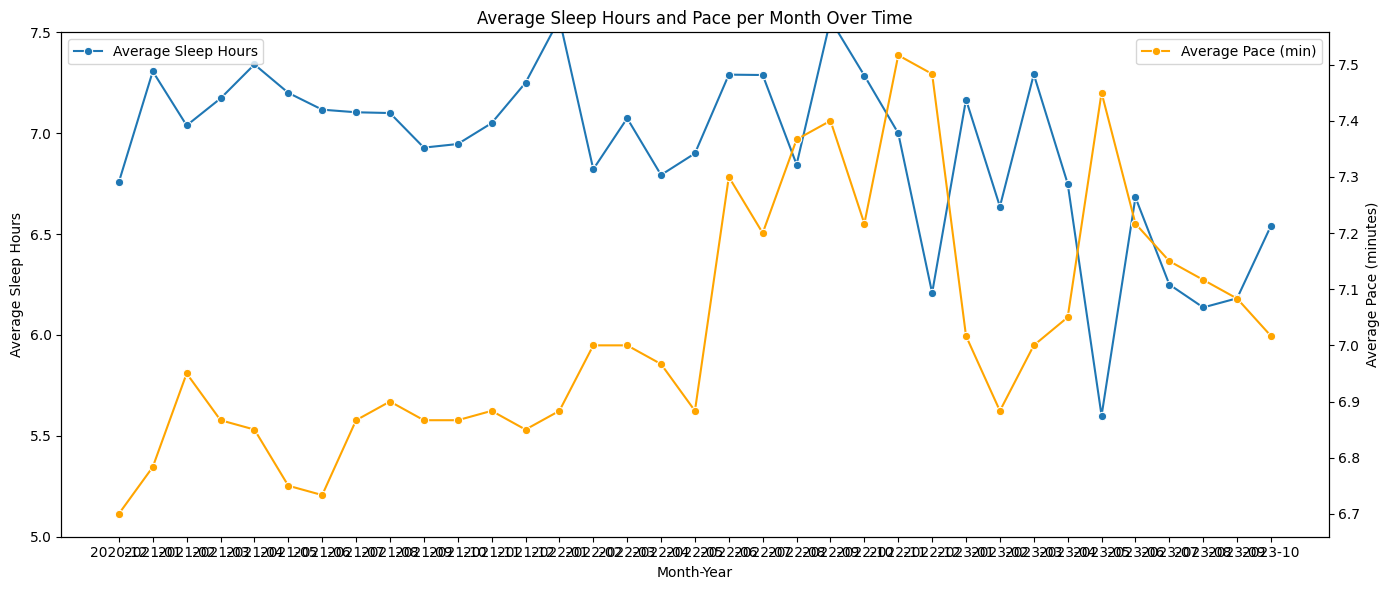

In [9]:
# Convert pace values from "minutes:seconds" format to numeric minutes for plotting
avg_pace_per_month_numeric = avg_pace_per_month.str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)


# Convert the month_year index to a string format for plotting
avg_pace_per_month_numeric.index = avg_pace_per_month_numeric.index.astype(str)

# Set up the plot with sleep hours
plt.figure(figsize=(14, 6))
ax1 = sns.lineplot(x=avg_sleep_per_month_derived['month_year'], 
                   y=avg_sleep_per_month_derived['sleepHours'], 
                   marker='o', 
                   label='Average Sleep Hours')
ax1.set_title('Average Sleep Hours and Pace per Month Over Time')
ax1.set_ylabel('Average Sleep Hours')
ax1.set_xlabel('Month-Year')
ax1.set_ylim(5, 7.5)
ax1.legend(loc='upper left')

# Create a secondary y-axis for the pace values
ax2 = ax1.twinx()
sns.lineplot(x=avg_pace_per_month_numeric.index, 
             y=avg_pace_per_month_numeric.values, 
             marker='o', 
             ax=ax2, 
             color='orange', 
             label='Average Pace (min)')
ax2.set_ylabel('Average Pace (minutes)')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


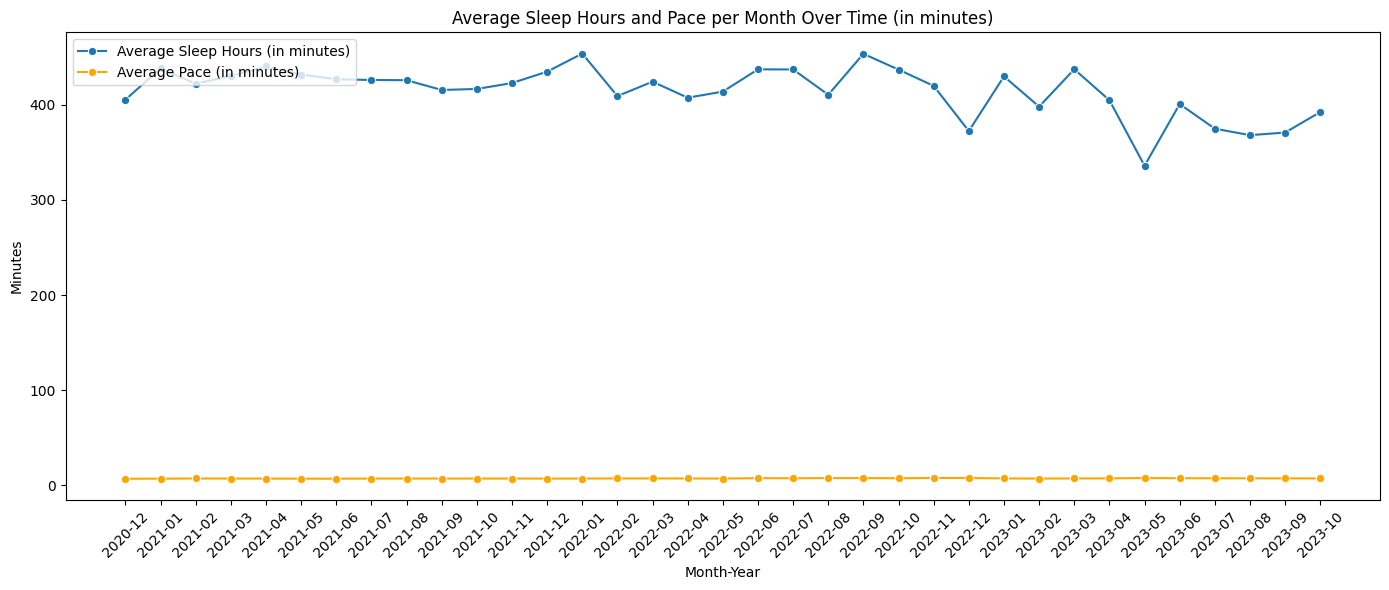

In [10]:
# Convert the sleep hours to minutes for plotting on the same scale
avg_sleep_per_month_minutes = avg_sleep_per_month_derived['sleepHours'] * 60

# Set up the plot
plt.figure(figsize=(14, 6))
sns.lineplot(x=avg_sleep_per_month_derived['month_year'], 
             y=avg_sleep_per_month_minutes, 
             marker='o', 
             label='Average Sleep Hours (in minutes)')
sns.lineplot(x=avg_pace_per_month_numeric.index, 
             y=avg_pace_per_month_numeric.values, 
             marker='o', 
             color='orange', 
             label='Average Pace (in minutes)')

plt.title('Average Sleep Hours and Pace per Month Over Time (in minutes)')
plt.ylabel('Minutes')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


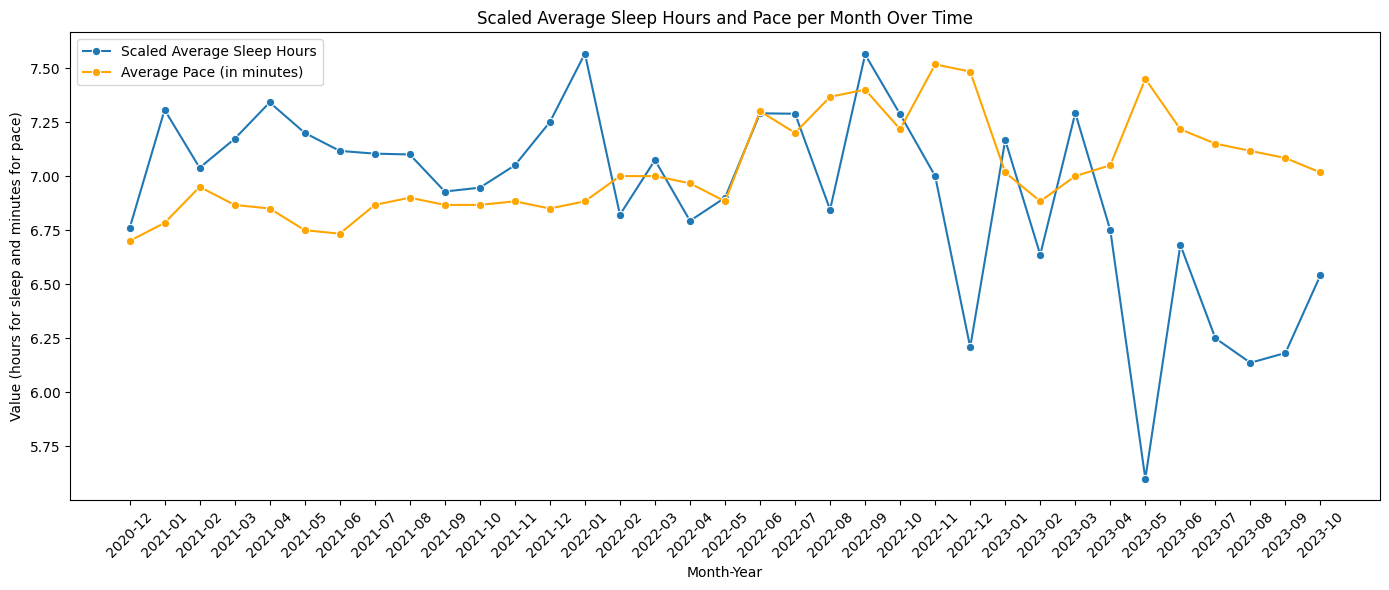

In [11]:
# Scale down the avg_sleep_per_month_minutes to its original scale (hours)
scaled_sleep_hours = avg_sleep_per_month_minutes / 60

# Set up the plot
plt.figure(figsize=(14, 6))
sns.lineplot(x=avg_sleep_per_month_derived['month_year'], 
             y=scaled_sleep_hours, 
             marker='o', 
             label='Scaled Average Sleep Hours')
sns.lineplot(x=avg_pace_per_month_numeric.index, 
             y=avg_pace_per_month_numeric.values, 
             marker='o', 
             color='orange', 
             label='Average Pace (in minutes)')

plt.title('Scaled Average Sleep Hours and Pace per Month Over Time')
plt.ylabel('Value (hours for sleep and minutes for pace)')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [12]:
# Group by month_year and calculate the mean of the length column
avg_length_per_month = filtered_df.groupby('month_year')['length'].mean()

avg_length_per_month


month_year
2020-12     5.327742
2021-01     5.312258
2021-02     5.048077
2021-03     5.355172
2021-04     4.846818
2021-05     4.773000
2021-06     4.702333
2021-07     4.845172
2021-08     4.896667
2021-09     4.429643
2021-10     4.482500
2021-11     4.929000
2021-12     4.868750
2022-01     4.187667
2022-02     4.851071
2022-03     3.718889
2022-04     3.588276
2022-05     3.314000
2022-06     9.227097
2022-07     9.118077
2022-08     9.768621
2022-09     7.227083
2022-10     9.791500
2022-11     8.414118
2022-12     9.427500
2023-01    10.593333
2023-02    12.108182
2023-03    11.147273
2023-04    13.733571
2023-05    14.144444
2023-06    13.898182
2023-07    13.915000
2023-08    13.735455
2023-09    15.084545
2023-10    12.699091
Freq: M, Name: length, dtype: float64

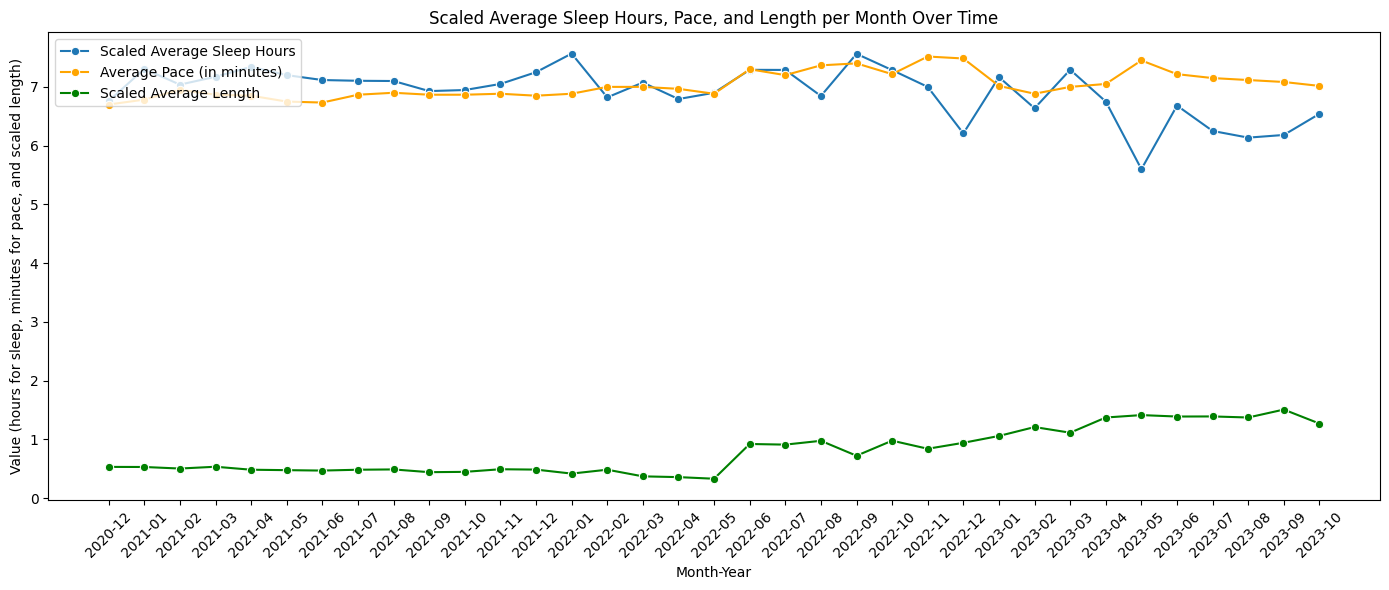

In [13]:
# Scale down the avg_length_per_month for visual comparability
scaled_avg_length = avg_length_per_month / 10

# Set up the plot
plt.figure(figsize=(14, 6))

# Plot scaled average sleep hours
sns.lineplot(x=avg_sleep_per_month_derived['month_year'], 
             y=scaled_sleep_hours, 
             marker='o', 
             label='Scaled Average Sleep Hours')

# Plot average pace
sns.lineplot(x=avg_pace_per_month_numeric.index, 
             y=avg_pace_per_month_numeric.values, 
             marker='o', 
             color='orange', 
             label='Average Pace (in minutes)')

# Plot scaled average length
sns.lineplot(x=scaled_avg_length.index.astype(str), 
             y=scaled_avg_length.values, 
             marker='o', 
             color='green', 
             label='Scaled Average Length')

plt.title('Scaled Average Sleep Hours, Pace, and Length per Month Over Time')
plt.ylabel('Value (hours for sleep, minutes for pace, and scaled length)')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


# I should remove all marathons from this

In [14]:
df.columns

Index(['runId', 'date', 'duration', 'runKey', 'imageUrl', 'length', 'type',
       'surface', 'pace', 'sleepHours', 'sleepToBedTime', 'sleepWakeTime',
       'runListenedTo', 'temperature', 'shoeAge', 'startTime', 'month_year'],
      dtype='object')

/tmp/ipykernel_32/1330157194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_date['month_year'] = filtered_df_date['date'].dt.to_period('M')
/tmp/ipykernel_32/1330157194.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_length['month_year'] = filtered_df_length['date'].dt.to_period('M')


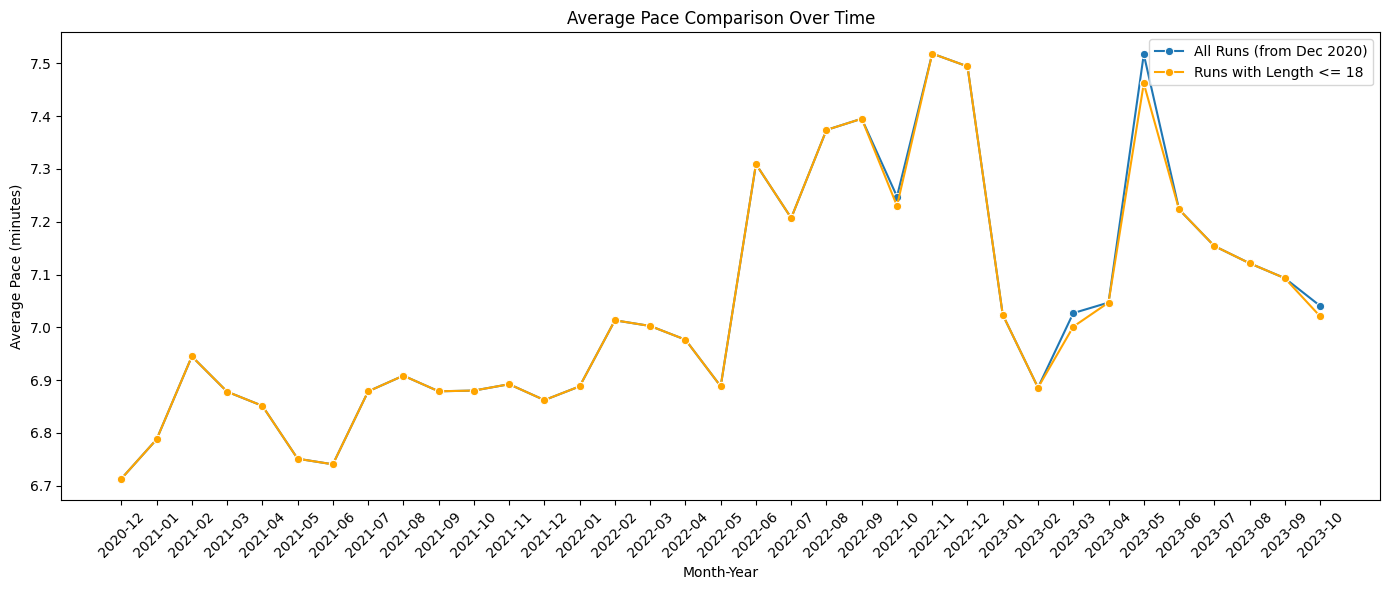

In [15]:
# Create the filtered dataframes as mentioned
filtered_df_date = df[df['date'] >= '2020-12-01']
filtered_df_length = filtered_df_date[filtered_df_date['length'] <= 18]

# Recalculate the month_year column for both filtered datasets
filtered_df_date['month_year'] = filtered_df_date['date'].dt.to_period('M')
filtered_df_length['month_year'] = filtered_df_length['date'].dt.to_period('M')

# Group by month_year and calculate the mean of pace for both datasets
avg_pace_date = filtered_df_date.groupby('month_year')['pace'].mean().dt.total_seconds().div(60)  # Convert to minutes
avg_pace_length = filtered_df_length.groupby('month_year')['pace'].mean().dt.total_seconds().div(60)  # Convert to minutes

# Plot the two datasets on the same chart
plt.figure(figsize=(14, 6))
sns.lineplot(x=avg_pace_date.index.astype(str), y=avg_pace_date, marker='o', label='All Runs (from Dec 2020)')
sns.lineplot(x=avg_pace_length.index.astype(str), y=avg_pace_length, marker='o', color='orange', label='Runs with Length <= 18')

plt.title('Average Pace Comparison Over Time')
plt.ylabel('Average Pace (minutes)')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


# Train, Test, Validate

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
# Load the data
df = pd.read_json('/kaggle/input/runlogoct272023/runlogOct272023.json')

# Convert time-related columns to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['sleepWakeTime'] = pd.to_datetime(df['sleepWakeTime'], errors='coerce')

# Clean 'pace' column and convert it to timedelta
df['pace'] = pd.to_timedelta(df['pace'], errors='coerce')

# Convert 'pace' to total seconds
df['pace'] = df['pace'].dt.total_seconds()

# Handle missing values and convert categorical variables
df = df.dropna(subset=['pace', 'sleepHours', 'sleepWakeTime', 'shoeAge', 'temperature'])  # Drop rows with missing target or important features
df['wakeUpTime'] = df['sleepWakeTime'].dt.hour + df['sleepWakeTime'].dt.minute / 60  # Convert to numeric hours
df['dayOfWeek'] = df['date'].dt.dayofweek  # Add day of week as a feature
df = pd.get_dummies(df, columns=['surface'], drop_first=True)  # One-hot encoding for 'surface'

# Features and target variable
features = ['sleepHours', 'wakeUpTime', 'shoeAge', 'dayOfWeek', 'temperature'] + [col for col in df.columns if col.startswith('surface_')]
target = 'pace'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model on the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 10.82964468529276
Root Mean Squared Error: 14.374022426878145


## Compare with baseline

In [35]:
# Step 1: Calculate the average 'pace' from the training data
average_pace = y_train.mean()

# Step 2: Use this average value to make baseline predictions on the test data
baseline_predictions = np.full_like(y_test, fill_value=average_pace)

# Step 3: Calculate the MAE and RMSE for the baseline predictions
baseline_mae = mean_absolute_error(y_test, baseline_predictions)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))

# Step 4: Compare these baseline metrics with those from the linear regression model
baseline_mae, baseline_rmse, mae, rmse

(13.897693037432957, 18.297151114517366, 10.82964468529276, 14.374022426878145)

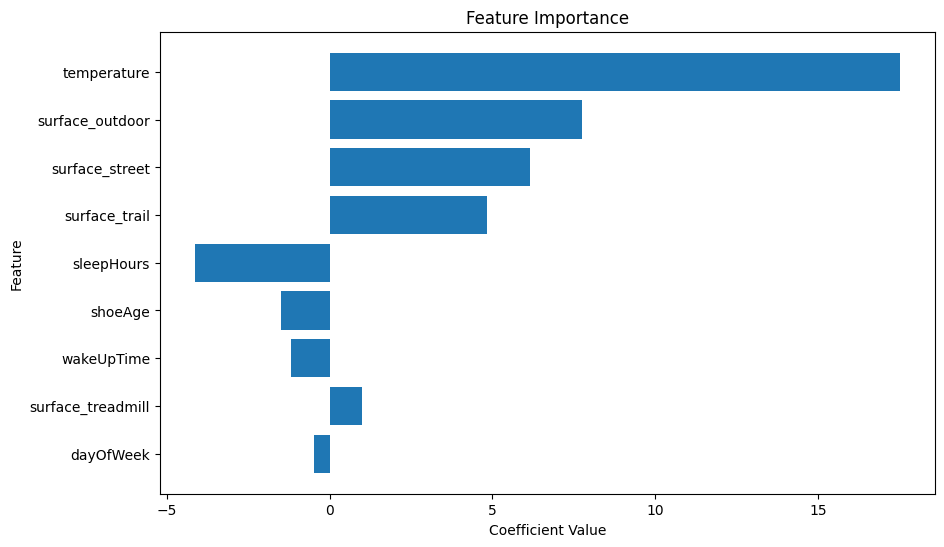

,Feature,Importance
4,temperature,17.510478
5,surface_outdoor,7.765422
6,surface_street,6.149269
7,surface_trail,4.848600
0,sleepHours,-4.135833
2,shoeAge,-1.480886
1,wakeUpTime,-1.194575
8,surface_treadmill,0.990339
3,dayOfWeek,-0.475837


In [37]:
from sklearn.preprocessing import StandardScaler


# Step 1: Standardize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the Model on the standardized features
linear_reg_model_scaled = LinearRegression()
linear_reg_model_scaled.fit(X_train_scaled, y_train)

# Step 3: Retrieve the Coefficients
feature_importances = linear_reg_model_scaled.coef_

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the features based on their importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', key=abs, ascending=False)

# Step 4: Create a Coefficient Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

feature_importance_df


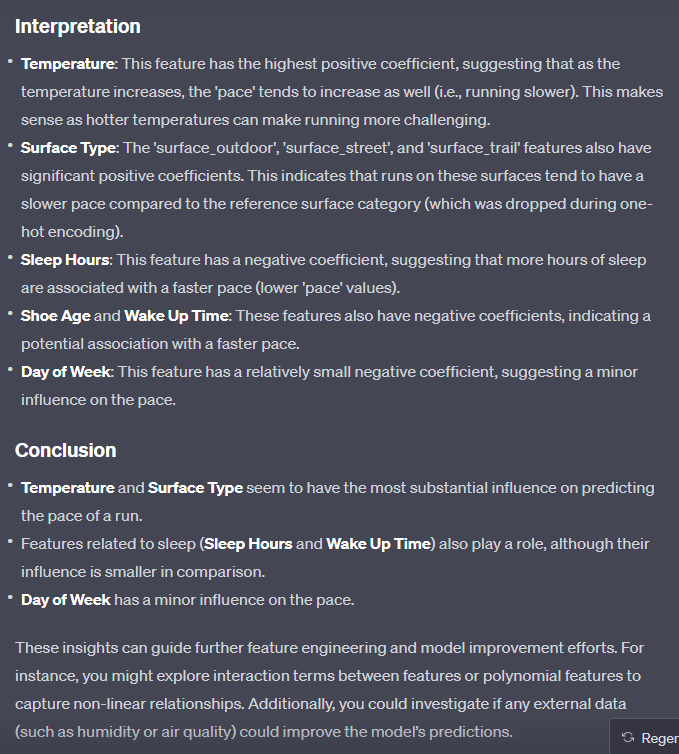

Though the model's predictions may be off by 10 seconds a mile which, to me, is huge, it at least seems consistent, so I trust the interpretation. At least, initially. 